### Customer Analysis Round2 with Pipeline

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
#Function for reading the data:
def read_customer_data():
    return pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")

In [64]:
#Function for standardizing column names:
def standardizing_column(df):
    new_columns = df.columns.str.lower().str.replace(" ", "_")
    df.columns = new_columns
    return df

In [50]:
#Function for dropping customer and unnamed:_0 columns
def drop_cols(df):
    df.drop(columns=["unnamed:_0", "customer"], inplace=True)
    return df

In [51]:
#Drop duplicates and reset index
def drop_dupl(df):
    df = df.drop_duplicates().reset_index()
    df.drop(columns=["index"], inplace=True)
    return df

In [52]:
#Replacing null values
def fill_null(df):
    df["number_of_open_complaints"] = df["number_of_open_complaints"].fillna(value=0)
    mean_months = round(df["months_since_last_claim"].mean())
    df["months_since_last_claim"] = df["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(df["income"].mean())
    df["income"] = df["income"].fillna(value=mean_income)
    return df

In [66]:
df["state"].value_counts()

California    3512
Oregon        2861
Arizona       1918
Nevada         987
Washington     885
Name: state, dtype: int64

In [67]:
def region(x):
    if x != x:
        return x
    else:
        dic = {"California": "West Region", "Oregon": "North West", "Washington": "East",
               "Arizona": "Central", "Nevada": "Central"}
        return dic[x]
    
df["region"] = df["state"].apply(region)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10163 non-null  object 
 1   customer_lifetime_value        10776 non-null  float64
 2   response                       10163 non-null  object 
 3   coverage                       10776 non-null  object 
 4   education                      10776 non-null  object 
 5   effective_to_date              10776 non-null  object 
 6   employmentstatus               10776 non-null  object 
 7   gender                         10776 non-null  object 
 8   income                         10776 non-null  int64  
 9   location_code                  10776 non-null  object 
 10  marital_status                 10776 non-null  object 
 11  monthly_premium_auto           10776 non-null  int64  
 12  months_since_last_claim        10776 non-null 

In [68]:
df["region"].value_counts()

West Region    3512
Central        2905
North West     2861
East            885
Name: region, dtype: int64

### Running the Pipeline

In [45]:
df = read_customer_data().pipe(standardizing_column).pipe(drop_cols).pipe(drop_dupl).pipe(fill_null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10163 non-null  object 
 1   customer_lifetime_value        10776 non-null  float64
 2   response                       10163 non-null  object 
 3   coverage                       10776 non-null  object 
 4   education                      10776 non-null  object 
 5   effective_to_date              10776 non-null  object 
 6   employmentstatus               10776 non-null  object 
 7   gender                         10776 non-null  object 
 8   income                         10776 non-null  int64  
 9   location_code                  10776 non-null  object 
 10  marital_status                 10776 non-null  object 
 11  monthly_premium_auto           10776 non-null  int64  
 12  months_since_last_claim        10776 non-null 

### Plotting

In [73]:
data_plot = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")

In [74]:
data_plot.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [85]:
Response = data_plot['Response'].value_counts()

In [86]:
Response

No     8813
Yes    1466
Name: Response, dtype: int64

### Plot of the total number of responses.

<AxesSubplot:title={'center':'Overall Response'}, ylabel='Response'>

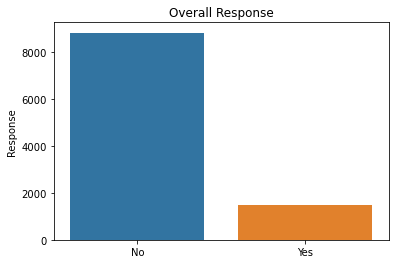

In [88]:
# create figure and axes
# subplots()
fig3, ax3 = plt.subplots()
# set title
# set_title()
ax3.set_title("Overall Response")
# plot the bar chart
# bar()

sns.barplot(x=Response.index ,y =Response)

### Plot of the response rate by the sales channel

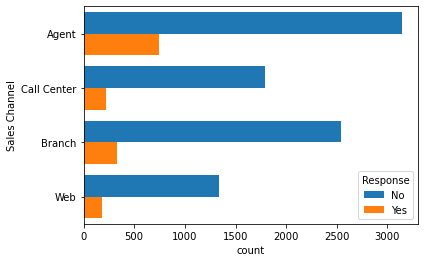

In [89]:
# plot of the response rate by the sales channel.


p=sns.countplot(data=data_plot, y="Sales Channel", hue="Response", saturation=1)

### Plot of the response rate by the total claim amount

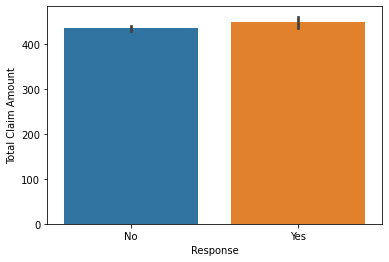

In [90]:
v=sns.barplot(data=data_plot, y="Total Claim Amount", x="Response")

### Plot of the response rate by income

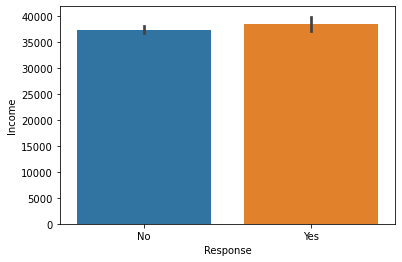

In [91]:
f=sns.barplot(data=data_plot, y="Income", x="Response")